<font color='blue'>Import Libraries </font>



In [ ]:
# installing ucimlrepo to fetch dataset
!pip install ucimlrepo

In [ ]:
# importing fetch_ucirepo to fetch dataset
from ucimlrepo import fetch_ucirepo

# importing train_test_split for spliting dataset
from sklearn.model_selection import train_test_split

# importing numpy library for numrric computation
import numpy as np

# importing mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# importing the matplotlib for ploting graphs and fugures
import matplotlib.pyplot as plt

### <font color='blue'> Task - 1  </font>:
Import the Bike Sharing Dataset (https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset)

In [ ]:
# fetching bikesharing dataset with id 275
bikeSharing = fetch_ucirepo(id=275)

# features from the datset
X = bikeSharing.data.features
# labels from the datset
y = bikeSharing.data.targets

# printing metadata of the dataset
print(bikeSharing.metadata)

# variables from the dataset
print(bikeSharing.variables)

{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'ID': 422, 'type': 'NATIVE', 'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 'Hadi Fanaee-T, João Gama', 'venue': 'Progress

### <font color='blue'> Task - 2  </font>:
Split the dataset into training, validation and test sets (70%-15%-15%).


In [ ]:
# splting dataser into training into temp with 70% and 30%
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# now splitting dataset into validation and testing
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

# printing the dimension of training set of both features and labels
print("Train set:", X_train.shape, y_train.shape)
# printing the dimension of validation set of both features and labels
print("Validation set:", X_val.shape, y_val.shape)
# printing the dimension of testing set of both features and labels
print("Test set:", X_test.shape, y_test.shape)

Train set: (12165, 13) (12165, 1)
Validation set: (2607, 13) (2607, 1)
Test set: (2607, 13) (2607, 1)


### <font color='blue'> Task - 3  </font>:
Implement a decision tree regressor from scratch using reduction in MSE of the target (Count of total no of bikes) as the node splitting criterion.

In [ ]:
# custom mean square error implementation
def meanSquareError(y):
    # if len of input then return mse 0
    if len(y) == 0:
        return 0
    # otherwise return mse with formula
    return np.mean((y - np.mean(y)) ** 2)

# decision Tree Node implementation
class DecisionTreeNode:
    # initiating class
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        # initializing feature
        self.feature = feature
        # initializing threshold
        self.threshold = threshold
        # initializing left Node
        self.left = left
        # initializing right Node
        self.right = right
        # initializing value of the Node
        self.value = value

# decision Tree Regression implementation
class DecisionTreeRegressorScratch:
    # initiating class
    def __init__(self, maxDepth=5, minSamplesSplit=10, minSamplesLeaf=5):
        # initializing max depth of the tree
        self.maxDepth = maxDepth
        # initializing minimum samples split of the tree
        self.minSamplesSplit = minSamplesSplit
        # initializing minimum samples leaf of the tree
        self.minSamplesLeaf = minSamplesLeaf
        # initializing root of the tree
        self.root = None

    # defining fit funtion
    def fit(self, X, y):
        # giving root and which is return node of build tree
        self.root = self.buildTree(np.array(X), np.array(y), depth=0)

    # defining best split
    def bestSplit(self, X, y):
        # initializing best feature best threshold best mse reduction
        bestFeature, bestThreshold, bestMseReduction = None, None, -1
        # getting samples and features from the inputs
        n_samples, n_features = X.shape
        # calculate mean square error of the giving label
        parentMse = meanSquareError(y)

        # looping for every features
        for feature in range(n_features):
            # giving threshold
            thresholds = np.unique(X[:, feature])
            # loop from the threshold
            for threshold in thresholds:
                # getting leftindex if its less than threshold
                leftIndex = X[:, feature] <= threshold
                # getting rightindex if its greater than threshold
                rightIndex = X[:, feature] > threshold

                # skipping condition
                if (len(y[leftIndex]) < self.minSamplesLeaf or
                    len(y[rightIndex]) < self.minSamplesLeaf):
                    continue

                # calculating mean square error of the left index
                mseLeft = meanSquareError(y[leftIndex])
                # calculating mean square error of the right index
                mseRight = meanSquareError(y[rightIndex])

                # calculating weighted mean square error
                weightedMse = (len(y[leftIndex]) / n_samples) * mseLeft + \
                               (len(y[rightIndex]) / n_samples) * mseRight

                # reduceding it from the parent the parent mean square error
                mseReduction = parentMse - weightedMse


                # getting the best mean square error reduction
                if mseReduction > bestMseReduction:
                    # getting best feature
                    bestFeature = feature
                    # getting best threshold
                    bestThreshold = threshold
                    # getting best mean square error Reduction
                    bestMseReduction = mseReduction

        # returing the best feature and best threshold
        return bestFeature, bestThreshold

    # function for building the tree
    def buildTree(self, X, y, depth):
        # creating the node
        if (depth >= self.maxDepth) or (len(y) < self.minSamplesSplit):
            return DecisionTreeNode(value=np.mean(y))

        # getting the feature and the threshold
        feature, threshold = self.bestSplit(X, y)

        # if feature is none then create node with the mean of the label
        if feature is None:
            return DecisionTreeNode(value=np.mean(y))

        # getting the leftindex of the current node which is less than threshld
        leftIndex = X[:, feature] <= threshold
        # getting the rightindex of the current node which is less than threshld
        rightIndex = X[:, feature] > threshold

        # now with one more depth creating the left child node of the current node which will be parent node of this node
        leftChild = self.buildTree(X[leftIndex], y[leftIndex], depth + 1)
        # now with one more depth same as left node creating the right child node of the current node which will be parent node of this node
        rightChild = self.buildTree(X[rightIndex], y[rightIndex], depth + 1)

        # returning the node
        return DecisionTreeNode(feature=feature, threshold=threshold,
                                left=leftChild, right=rightChild)

    def predictOne(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self.predictOne(x, node.left)
        else:
            return self.predictOne(x, node.right)

    # predict function for the decision tree
    def predict(self, X):
        return np.array([self.predictOne(x, self.root) for x in np.array(X)])


### <font color='blue'> Task - 4  </font>:

Tune the hyperparameters of the decision tree
- maximum depth of tree [10-18],
- minimum samples in node for split [7-12],
- minimum samples for leaf node [2-7]
on the validation set using grid search.

In [ ]:
# importing sklearn mean square error
from sklearn.metrics import mean_squared_error

# initializing best parameter with None
bestParams = None
# initializing best value with infinite
bestValMse = float("inf")

# as given interating max depth from 10 to 18
for maxDepth in range(10, 19):
    # as given interating for min samples in node for splitting 7 to 12
    for minSplit in range(7, 13):
        # as given interating for lead nodes 2 to 7
        for minLeaf in range(2, 8):
            # Training tree with these params
            tree = DecisionTreeRegressorScratch(
                maxDepth=maxDepth,
                minSamplesSplit=minSplit,
                minSamplesLeaf=minLeaf
            )
            # fitting the training data in the model
            tree.fit(X_train, y_train.values.ravel())
            # giving validation feature vector input to get label
            y_valPred = tree.predict(X_val)
            # calculating mean square error on that
            valMse = mean_squared_error(y_val, y_valPred)

            # getting best mean square error value over all iteration
            if valMse < bestValMse:
                bestValMse = valMse
                bestParams = (maxDepth, minSplit, minLeaf)

# printing best hyperparameters
print("Best Hyperparameters:", bestParams)
# prtinting best mean square error
print("Validation MSE:", bestValMse)

Best Hyperparameters: (15, 11, 5)
Validation MSE: 2688.563534907886


### <font color='blue'> Task - 5  </font>:
Evaluate the performance of the decision tree regressor on the test set using the best values of the hyperparameters you obtained in step 4.

In [ ]:
# importing r2 square from the sklearn
from sklearn.metrics import r2_score

# joining the training and validation inputs
X_trainVal = np.concatenate([X_train, X_val], axis=0)
# joining the training and validation labels
y_trainVal = np.concatenate([y_train.values.ravel(), y_val.values.ravel()], axis=0)

# using best hyperparameters which we got in the task 4
bestMaxDepth, bestMinSplit, bestMinLeaf = bestParams

# Retraining the tree on train+val
bestTree = DecisionTreeRegressorScratch(
    maxDepth=bestMaxDepth,
    minSamplesSplit=bestMinSplit,
    minSamplesLeaf=bestMinLeaf
)
# fitting the train + val inputs and train + val labels
bestTree.fit(X_trainVal, y_trainVal)

# Predicting the labels on test set
y_testPred = bestTree.predict(X_test)

# evaluating the performance
testMse = mean_squared_error(y_test, y_testPred)

# calculating the r2 square
test_r2 = r2_score(y_test, y_testPred)

# printing the test set performance
print("Test Set Performance")
# printing the mean square error
print("MSE:", testMse)
# printing the r2 score
print("R2 Score:", test_r2)

Test Set Performance
MSE: 2592.3793556807177
R2 Score: 0.9158436609139063


### <font color='blue'> Task - 6  </font>:
 Report the MSE obtained on the test set and show the scatter plot of predictions vs. Ground truths.

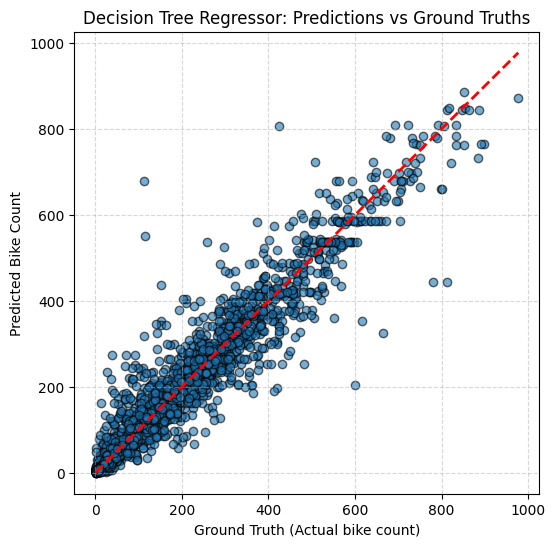

In [ ]:
# plotting the Scatter Plot (Predictions vs Ground Truths)
plt.figure(figsize=(6,6))

plt.scatter(y_test, y_testPred, alpha=0.6, edgecolors='k')

# giving values to the axises max and min of test labels...
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)

# x-axis, y-axis title
plt.xlabel("Ground Truth (Actual bike count)")
plt.ylabel("Predicted Bike Count")
plt.title("Decision Tree Regressor: Predictions vs Ground Truths")

# adding the grid inside the plot
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

### <font color='blue'> Task - 7  </font>:
 Fit a decision tree regressor model on the training set using scikit learn. Also, perform the cross validation and find the best values of the three hyperparameters in the same way as explained in case of the from scratch implementation.

In [ ]:
# importing sklearn DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# importing the sklearn GridSearchCV
from sklearn.model_selection import GridSearchCV

# Droping date column because DecisionTreeRegressor requires numeric input
X_trainSklearn = X_train.drop(columns=["dteday"])
X_valSklearn   = X_val.drop(columns=["dteday"])
X_testSklearn  = X_test.drop(columns=["dteday"])

# Defining the parameter grid (same as scratch version)
paramGrid = {
    "max_depth": list(range(10, 19)),
    "min_samples_split": list(range(7, 13)),
    "min_samples_leaf": list(range(2, 8))
}

# Initializing sklearn Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Grid Search with 5-fold Cross Validation
gridSearch = GridSearchCV(
    estimator=dt,
    param_grid=paramGrid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

# Fitint the modell on training data (numeric only)
gridSearch.fit(X_trainSklearn, y_train.values.ravel())

# get best hyperparameters and score
print("Best Hyperparameters (sklearn):", gridSearch.best_params_)
print("Best Cross-Val MSE:", -gridSearch.best_score_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters (sklearn): {'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 11}
Best Cross-Val MSE: 3100.850105240375


### <font color='blue'> Task - 8  </font>:
Evaluate the performance of the decision tree regressor from scikit-learn on the test set using the best values of the hyperparameters you obtained in Task 7.  

In [ ]:
# joining the train + validation sets (numeric only)
X_trainValSklearn = np.concatenate([X_trainSklearn, X_valSklearn], axis=0)
y_trainVal = np.concatenate([y_train.values.ravel(), y_val.values.ravel()], axis=0)

# Getint best hyperparameters from grid search
bestParamsSklearn = gridSearch.best_params_

# Retraining  Decision Tree using best params
bestDT = DecisionTreeRegressor(
    max_depth=bestParamsSklearn["max_depth"],
    min_samples_split=bestParamsSklearn["min_samples_split"],
    min_samples_leaf=bestParamsSklearn["min_samples_leaf"],
    random_state=42
)
# fitting the train + val inputs and train + val labels
bestDT.fit(X_trainValSklearn, y_trainVal)

# Predicting label on test set (numeric only)
y_testPredSklearn = bestDT.predict(X_testSklearn)

# Evaluating the mean square error and the r2 square on the test
testMseSklearn = mean_squared_error(y_test, y_testPredSklearn)
testr2Sklearn = r2_score(y_test, y_testPredSklearn)

# printing the sklearn decision tree performance on the test set
print("Scikit-learn Decision Tree Performance on Test Set")
# printing the mean square error
print("MSE:", testMseSklearn)
# printing the r2 score
print("R2 Score:", testr2Sklearn)

Scikit-learn Decision Tree Performance on Test Set
MSE: 2625.2624095698175
R2 Score: 0.9147761792479946


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


### <font color='blue'> Task - 9  </font>:
Report the MSE obtained on the test set and show the scatter plot of predictions obtained with scikit-learn's decision tree model vs. ground truths

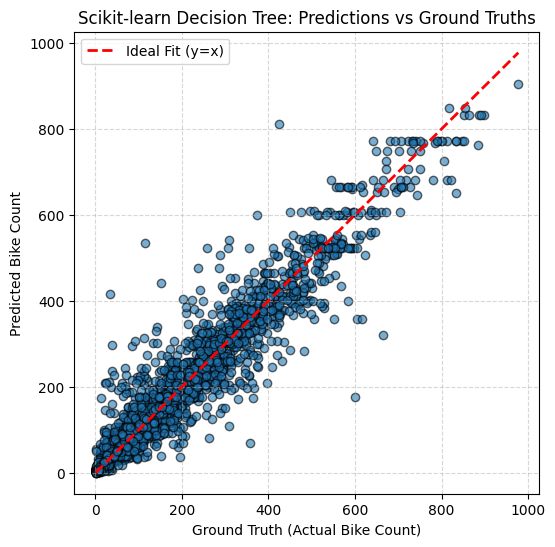

In [ ]:
# plotting the Scatter Plot (Predictions vs Ground Truths)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_testPredSklearn, alpha=0.6, edgecolors='k')

# giving values to the axises max and min of test labels...
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--', lw=2, label="Ideal Fit (y=x)"
)

# giving xaxis yaxis and title to the plot
plt.xlabel("Ground Truth (Actual Bike Count)")
plt.ylabel("Predicted Bike Count")
plt.title("Scikit-learn Decision Tree: Predictions vs Ground Truths")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

### <font color='blue'> Task - 10  </font>:
Visualize the decision tree regressor learned by scikit-learn using scikit-learn's plot-tree: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

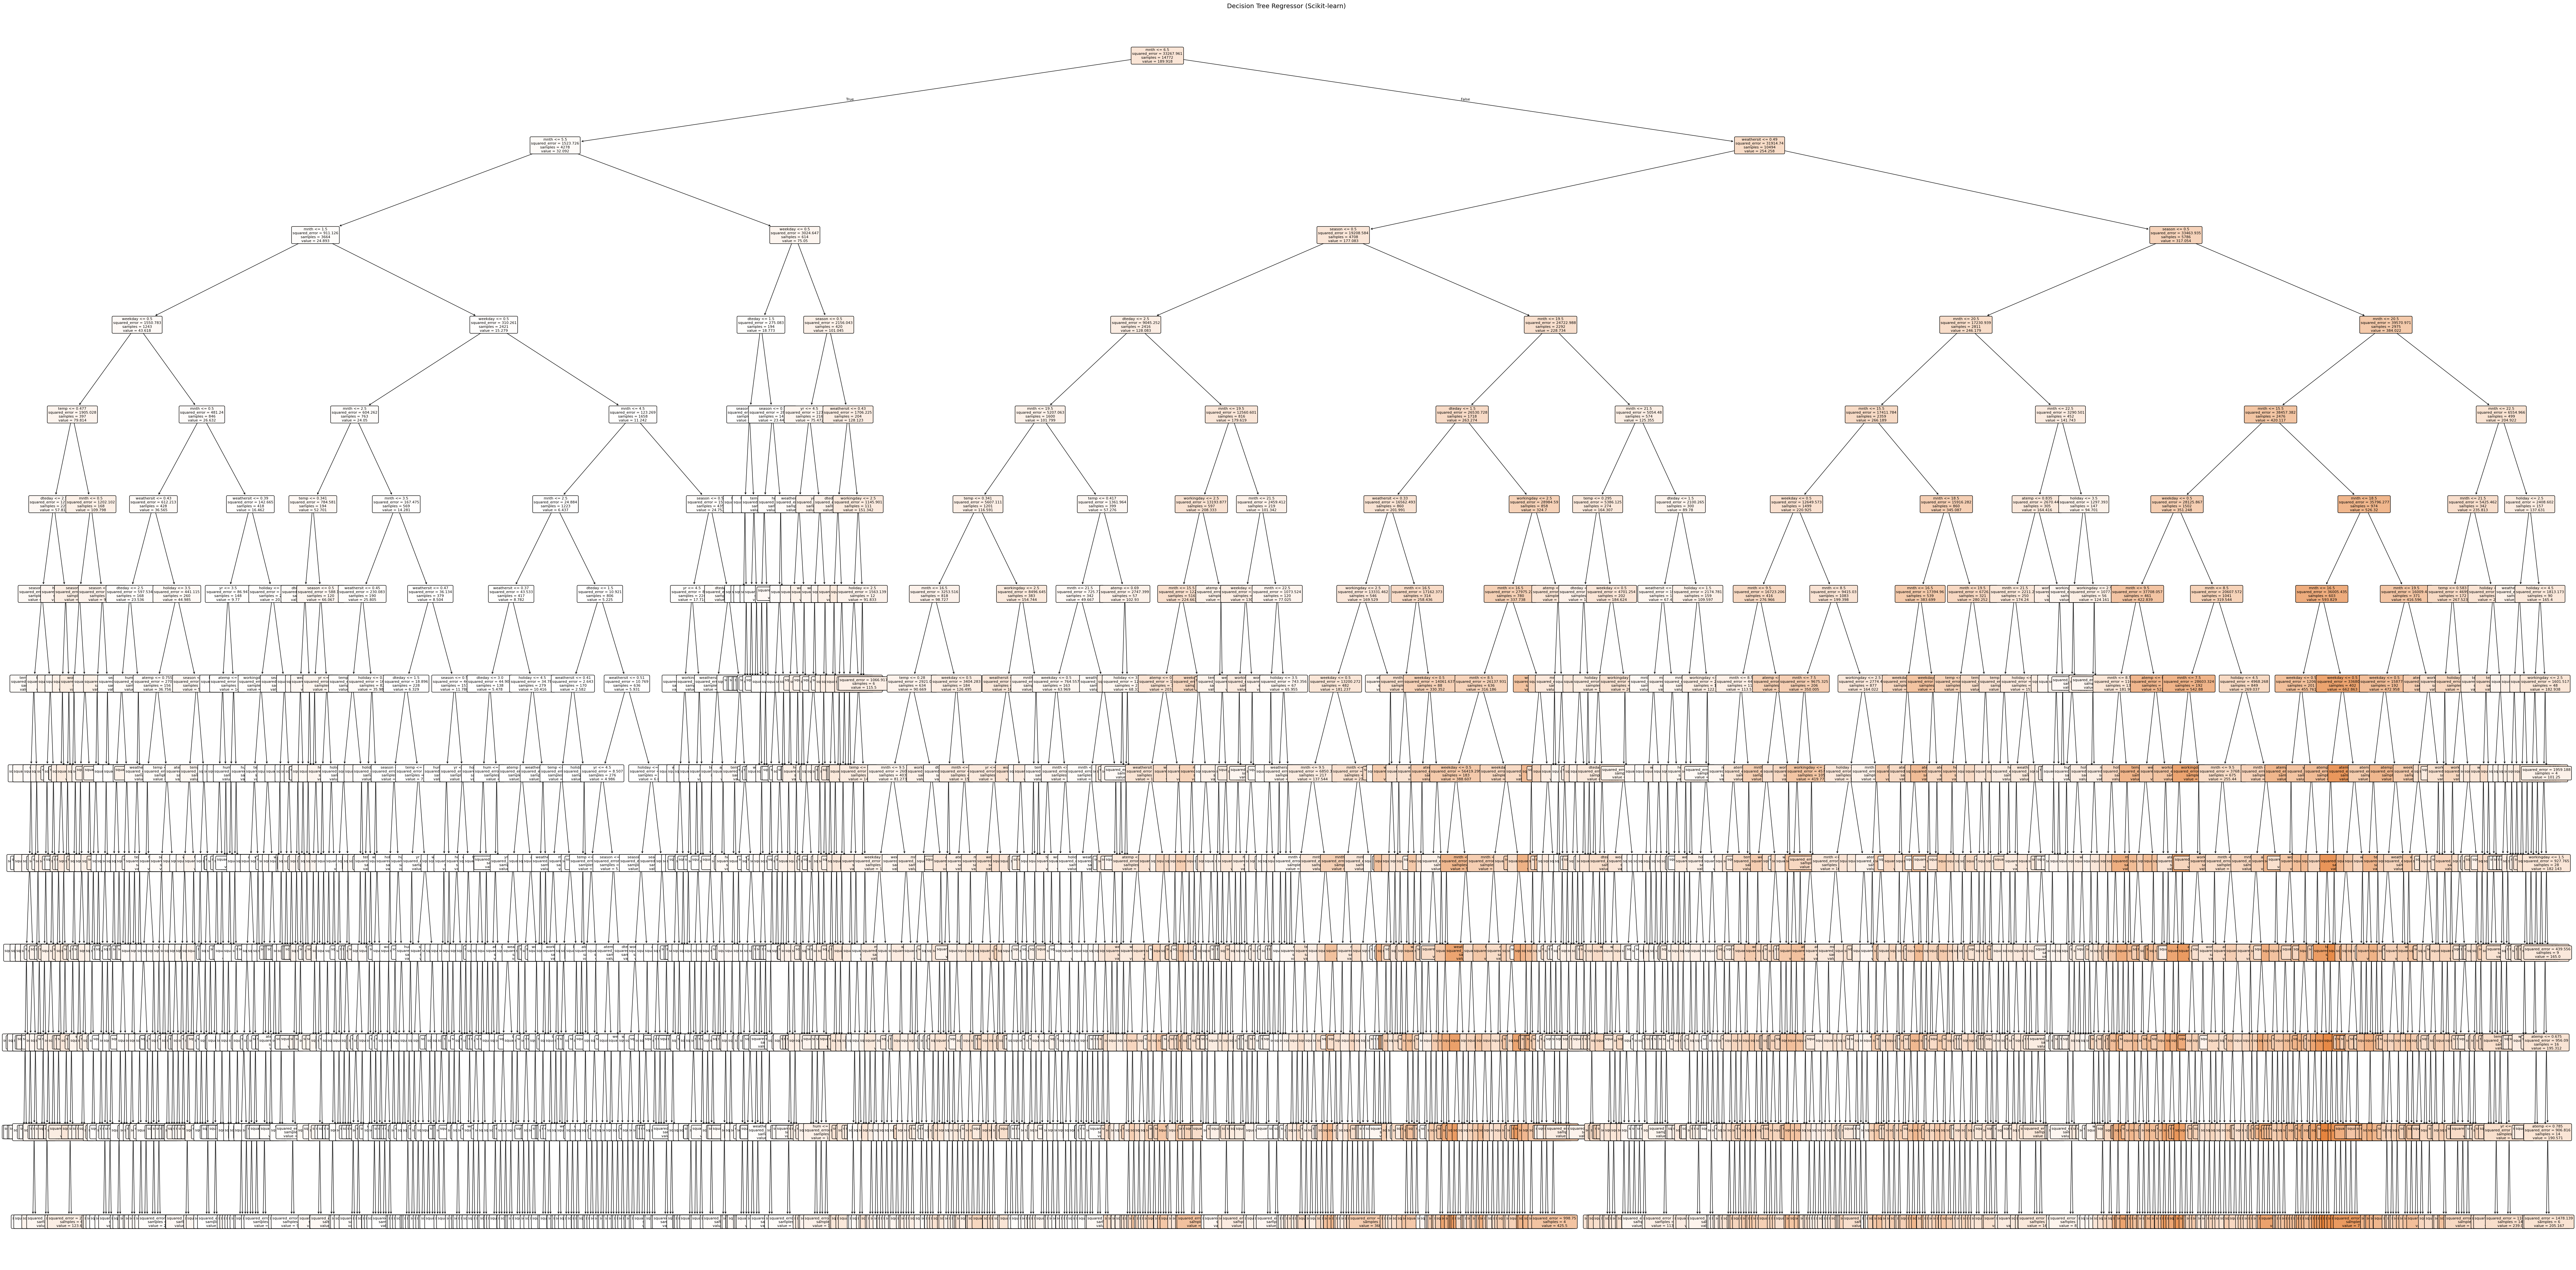

In [ ]:
# importing the plot_tree from the sklearn
from sklearn.tree import plot_tree

# plotting the trained decision tree
plt.figure(figsize=(100,50))
plot_tree(
    bestDT,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=8
)

# giving the title to the tree
plt.title("Decision Tree Regressor (Scikit-learn)", fontsize=14)
plt.show()

### <font color='blue'> Task - 11  </font>:
Compare the best values of hyperparameters and prediction performance of the from scratch implementation and the scikit-learn implementation of decision tree regressor.

In [ ]:
import pandas as pd
# I have craetedd the pandas dataframe for comparision of scratch and sklearn decision tree
comparison = pd.DataFrame({
    "Implementation": ["Scratch", "Scikit-learn"],
    "Best maxDepth": [bestParams[0], bestParamsSklearn["max_depth"]],
    "Best minSamplesSplit": [bestParams[1], bestParamsSklearn["min_samples_split"]],
    "Best minSamplesLeaf": [bestParams[2], bestParamsSklearn["min_samples_leaf"]],
    "Test MSE": [testMse, testMseSklearn],
    "Test R²": [test_r2, testr2Sklearn]
})

print("Comparison of Scratch vs Scikit-learn Decision Tree Regressor")
display(comparison)

Comparison of Scratch vs Scikit-learn Decision Tree Regressor


Implementation  Best maxDepth  Best minSamplesSplit  Best minSamplesLeaf  \
0        Scratch             15                    11                    5   
1   Scikit-learn             13                    11                    2   

      Test MSE   Test R²  
0  2592.379356  0.915844  
1  2625.262410  0.914776